*Analyse de l'incidence de la varicelle

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [2]:
data_url = "https://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

In [3]:
raw_data = pd.read_csv("https://www.sentiweb.fr/datasets/incidence-PAY-7.csv", skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202021          7    846        0    1698       1           0   
1     202020          7    837       19    1655       1           0   
2     202019          7    310        0     753       0           0   
3     202018          7    849       98    1600       1           0   
4     202017          7    272        0     658       0           0   
5     202016          7    758       78    1438       1           0   
6     202015          7   1918      675    3161       3           1   
7     202014          7   3879     2227    5531       6           3   
8     202013          7   7326     5236    9416      11           8   
9     202012          7   8123     5790   10456      12           8   
10    202011          7  10198     7568   12828      15          11   
11    202010          7   9011     6691   11331      14          10   
12    202009          7  13631    10544   16718      21          16   
13    202008          7  10424     7708   13140      16          12   
14    202007          7   8959     6574   11344      14          10   
15    202006          7   9264     6925   11603      14          10   
16    202005          7   8505     6314   10696      13          10   
17    202004          7   7991     5831   10151      12           9   
18    202003          7   5968     4100    7836       9           6   
19    202002          7   6534     4530    8538      10           7   
20    202001          7   9835     7019   12651      15          11   
21    201952          7   7941     5246   10636      12           8   
22    201951          7   5823     3675    7971       9           6   
23    201950          7   6424     4276    8572      10           7   
24    201949          7   6621     4540    8702      10           7   
25    201948          7   5542     3383    7701       8           5   
26    201947          7   7536     5058   10014      11           7   
27    201946          7   2638     1316    3960       4           2   
28    201945          7   4492     2615    6369       7           4   
29    201944          7   5728     3627    7829       9           6   
...      ...        ...    ...      ...     ...     ...         ...   
1508  199126          7  17608    11304   23912      31          20   
1509  199125          7  16169    10700   21638      28          18   
1510  199124          7  16171    10071   22271      28          17   
1511  199123          7  11947     7671   16223      21          13   
1512  199122          7  15452     9953   20951      27          17   
1513  199121          7  14903     8975   20831      26          16   
1514  199120          7  19053    12742   25364      34          23   
1515  199119          7  16739    11246   22232      29          19   
1516  199118          7  21385    13882   28888      38          25   
1517  199117          7  13462     8877   18047      24          16   
1518  199116          7  14857    10068   19646      26          18   
1519  199115          7  13975     9781   18169      25          18   
1520  199114          7  12265     7684   16846      22          14   
1521  199113          7   9567     6041   13093      17          11   
1522  199112          7  10864     7331   14397      19          13   
1523  199111          7  15574    11184   19964      27          19   
1524  199110          7  16643    11372   21914      29          20   
1525  199109          7  13741     8780   18702      24          15   
1526  199108          7  13289     8813   17765      23          15   
1527  199107          7  12337     8077   16597      22          15   
1528  199106          7  10877     7013   14741      19          12   
1529  199105          7  10442     6544   14340      18          11   
1530  199104          7   7913     4563   11263      14           8   
1531  199103          7  15387    10484   20290      27          18   
1532  199102          7  16277  

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

In [5]:
data = raw_data.dropna().copy()

In [6]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [7]:
sorted_data = data.set_index('period').sort_index()

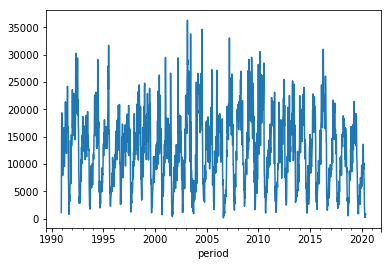

In [8]:
sorted_data['inc'].plot()

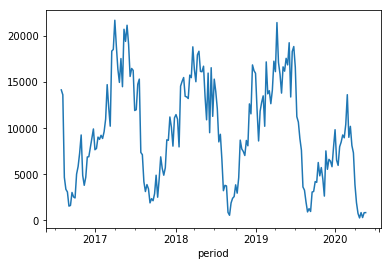

In [9]:
sorted_data['inc'][-200:].plot()

In [10]:
first_august_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

In [11]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

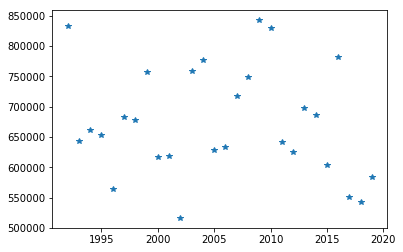

In [12]:
yearly_incidence.plot(style='*')

In [13]:
yearly_incidence.sort_values()

2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

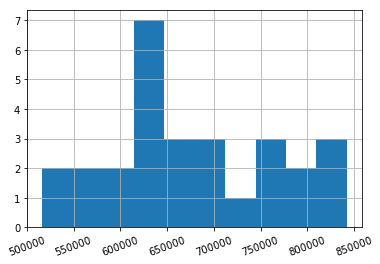

In [14]:
yearly_incidence.hist(xrot=20)